# Gradient descent with projection and augmented lagrangian algorithm

To find the infimum of an arbitrary cost function, we use here the gradient descent. Let us consider the function $f(x,y)=0.5(x^2+(y-1)^2)$ that we aim at minimizing on $K\subset \mathbb{R}^2$ with $K=\{(x,y) |  x= y\}$.
We start by manually compute its gradient and we will display its evolution during gradient descent.

In [ ]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib

### 1. Complete the following code

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x1,x2):
    # function
    return ...
def df(x1,x2):
    # gradient
    return ...
def g(x1,x2):
    # constraint
    return ...
def dg(x1,x2):
    # constraint gradient
    return ...
def L(x1,x2,mu): 
    # lagrangian
    return ...
def Lc(x1,x2,mu,c): 
    # augmented lagrangian
    return ...
def dxLc(x1,x2,mu,c): 
    # augmented lagrangian gradient
    return ...

We need to define a norm to now how far from the global solution we are.


In [2]:
def norm(a):
    return np.sqrt(a[0]**2+a[1]**2)

With $\alpha$ too big, we found out that the solution blows up in the previous exercice, a correct choice for $\alpha$ is very important. That is why, we will proceed with Armijo-Wolfe rule: 

In [3]:
# Wolfe rule:

c1=.6
c2=.8
beta=1. #test with beta=1
eta=2.
gamma=0.01

def phik(xyk,alphak,dk,fc,mu,c):
    return fc(xyk[0]+alphak*dk[0],xyk[1]+alphak*dk[1],mu,c)

def dphik(xyk,alphak,dk,dfc,mu,c):
    grad_f=dfc(xyk[0]+alphak*dk[0],xyk[1]+alphak*dk[1],mu,c)
    return np.dot(grad_f,dk)

    
def wolfe_rule(alpha,xy_old,d,fc,dfc,mu=0,c=0): #d_x est la direction de descente d_x . grad_x <= 0
    # test f(x_new) \leq f(x_0) + c alpha ps{d_x}{grad_x}

    test = 1
    iteration = 0
    min_ = 0
    max_ = 1000
    while (phik(xy_old,alpha,d,fc,mu,c)<=(phik(xy_old,0,d,fc,mu,c)+c1*dphik(xy_old,0,d,dfc,mu,c)*alpha)) &(iteration<=500): #armijo ok
        alpha=eta*alpha
    iteration = 0
    while (test!=0)&(iteration<=500): 
        xnew0,xnew1=xy_old[0]+alpha*d[0],xy_old[1]+alpha*d[1]
        if (phik(xy_old,alpha,d,fc,mu,c)<= (phik(xy_old,0,d,fc,mu,c)+c1*dphik(xy_old,0,d,dfc,mu,c)*alpha)) & (np.dot(dfc(xnew0,xnew1,mu,c),d) >= c2*np.dot(dfc(xy_old[0],xy_old[1],mu,c),d) ):
            test = 0
        elif phik(xy_old,alpha,d,fc,mu,c)> (phik(xy_old,0,d,fc,mu,c)+c1*dphik(xy_old,0,d,dfc,mu,c)*alpha): #no armijo
            max_ = alpha
            alpha = (max_ + min_)/2
            iteration = iteration +1
        else: # armijo ok
            minorant = alpha
            alpha = (max_ + min_)/2
            iteration = iteration +1
    return alpha

### 2. Now we proceed with the Gradient descent algorithm with Armijo-Wolfe rule: Complete the following code

In [6]:
def GradientDescent(fc,dfc,xy0,beta,mu=0,c=0):
    #initialization for Armijo
    alpha=beta

    # start GD algorithm
    eps=1e-6
    x0,y0=xy0[0],xy0[1] #starting points
    evolution = [[x0, y0]]
    grad_f = ... #gradient function of Lc
    cpt_grad=0

    while norm(grad_f)>=eps and cpt_grad<500:
    
        d = ... #direction
        alpha=beta  #armijo
        xy_old=np.array([x0,y0])        
        alpha=wolfe_rule(alpha,xy_old,d,fc,dfc, mu=mu,c=c) # find best alpha
        x0, y0 = ...
        evolution = np.vstack((evolution, [x0, y0]))
        grad_f = ...
        cpt_grad+=1
    return evolution

### 3. Complete the code of the augmented lagrangian:

In [ ]:
#initialization for Armijo
alpha=beta
## start GD algorithm
eps=1e-6
# initial points
x1,x2=1.,1.
c=1. # penalty parameter
mu=1.7 # dual variable
gold=... # not a golden function, but the constraints are very precious
gradx_f = ... # gradient of the augmented lagrangian
cpt=0 # to avoid infinite while loop
xy0=[x1,x2]


while norm(gradx_f)>eps or np.abs(g(x1,x2))>eps :
    evolution=...
    evolution_X = evolution[:, 0]
    evolution_Y = evolution[:, 1]
    x1,x2=evolution_X[-1],evolution_Y[-1] # last points
    print("x1:", x1, " x2:", x2)
    if (np.abs(g(x1,x2)))<np.abs(gold): # if ||g|| is small 
        #print("||g|| smaller",np.abs(g(x1,x2)))
        mu=... #increase mu
        print("new mu: ", mu)
        
    else:
        c=... # increase c
        print("new c: ",c)
    cpt+=1
    gold=... #updates
    gradx_f = ...
    print("norm of gradx_f: ",norm(gradx_f))
    if cpt==20:
        break
        


We can display the solution onto the contour of $f$ or onto the contour of $L_c$

mu 0.5000001501871618


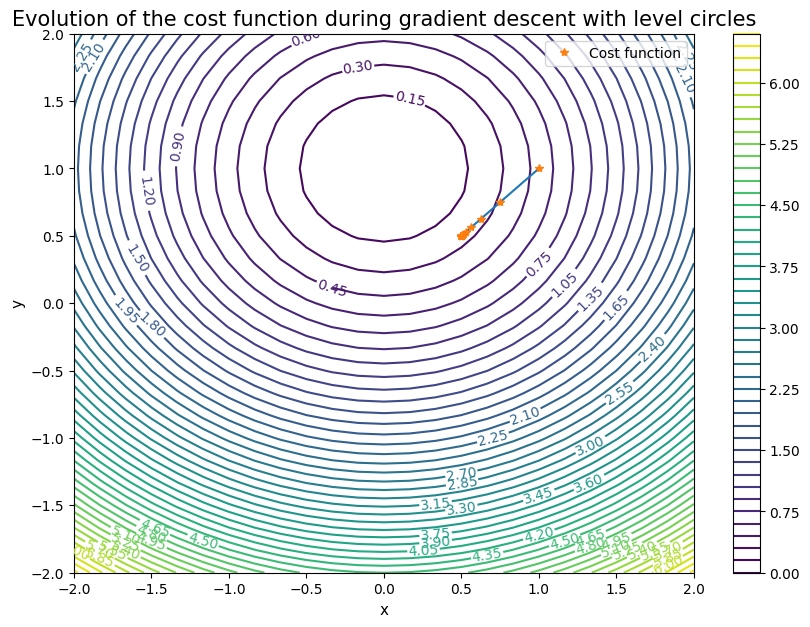

In [12]:
evolution_X = evolution[:, 0]
evolution_Y = evolution[:, 1]
x1 = np.linspace(-2, 2, 25)
y1 = np.linspace(-2, 2, 25)
Xx, Yy = np.meshgrid(x1, y1)
print("mu",mu)
#mu=1.#0.5

#Z = Lc(Xx, Yy,mu=mu,c=0)
Z = f(Xx, Yy)

fig= plt.figure(figsize = (10,7))
contours = plt.contour(Xx, Yy, Z, 45)
plt.clabel(contours, inline = True, fontsize = 10)
plt.title("Evolution of the cost function during gradient descent with level circles", fontsize=15)
plt.plot(evolution_X, evolution_Y)
plt.plot(evolution_X, evolution_Y, '*', label = "Cost function")
plt.xlabel('x', fontsize=11)
plt.ylabel('y', fontsize=11)
plt.colorbar()
plt.legend(loc = "upper right")
plt.show()

### 4. We add new constraints: $(x,y)$ must stay in $K=[-2.,0]\times [-2,0]$. Complete the code that finds the projection of $(x,y)$ on a cuboid $K$. Then, change the gradient descent algorithm to take into account this projection step

In [15]:
def proj(K,x):
    #K=[[l0,u0],[l1,u1]]
    l0=...
    u0=...
    l1=...
    u1=...
    return ...,...
    

In [16]:
# NEW GRADIENT DESCENT ALGORITHM:

def GradientDescent(fc,dfc,xy0,beta,mu=0,c=0):
    #initialization for Armijo
    alpha=beta
    ## start GD algorithm
    eps=1e-6
    x0,y0=xy0[0],xy0[1]#1,2
    evolution = [[x0, y0]]
    grad_f = ...
    cpt_grad=0

    while norm(grad_f)>=eps and cpt_grad<500:
    
        d = ...
        #armijo
        alpha=beta
        xy_old=np.array([x0,y0])        
        alpha=wolfe_rule(alpha,xy_old,d,fc,dfc, mu=mu,c=c)
        x0, y0 = ...
        evolution = np.vstack((evolution, [x0, y0]))
        grad_f = ...
        cpt_grad+=1
    return evolution



In [ ]:
## AUGMENTED LAGRANGIAN WITH PROJECTION
alpha=beta
## start GD algorithm
eps=1e-6

x1,x2=1.,1.#0.5
c=1.
mu=1.7
gold=...
gradx_f = ...
cpt=0
xy0=[x1,x2]

K=...
while norm(gradx_f)>eps or np.abs(g(x1,x2))>eps :
    evolution=...
    evolution_X = evolution[:, 0]
    evolution_Y = evolution[:, 1]
    x1=evolution_X[-1]
    x2=evolution_Y[-1]
    print("x1:", x1, " x2:", x2)
    if (np.abs(g(x1,x2)))<np.abs(gold):
        #print("||g|| smaller",np.abs(g(x1,x2)))
        mu=...
        #print("mu", mu)
        
    else:
        c=...
        print("c",c)
    cpt+=1
    gold=...
    gradx_f =...
    print("norm: ",norm(gradx_f))
    print("mu: ", mu)
    if cpt==20:
        break
        

### 5. You should find $\mu=1$, and $(x_1,x_2)=0,0$.
The constraints $-x_1 \leq 2$ and $-x_2 \leq 2$ are inactive, and thus the associated dual variables are equal to $0$.
With $\mu=1$, we find $\lambda_1=1$ and $\lambda_2=0$ the dual variables associated to $x_1 \leq 0$ and $x_2 \leq 0$. 

Draw the new augmented lagrangian with these constraints added:

mu 0.5


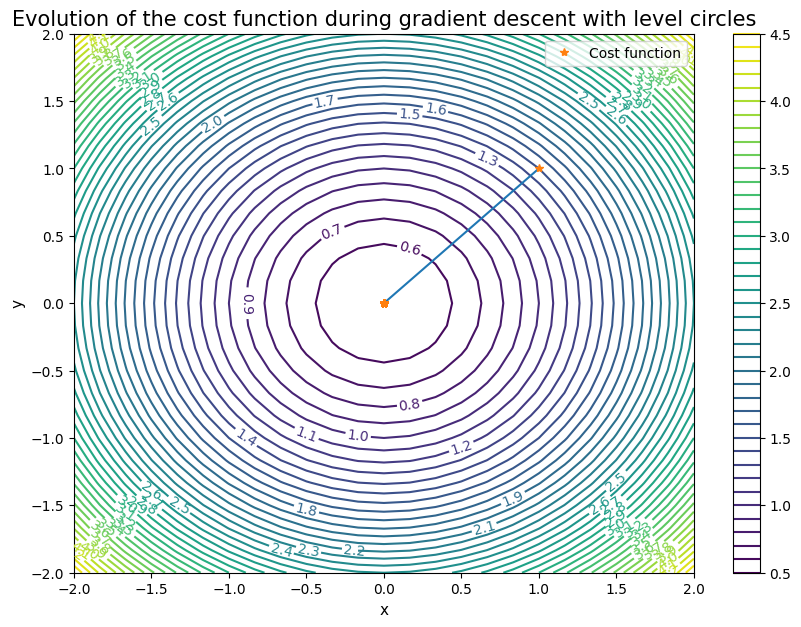

In [27]:
evolution_X = evolution[:, 0]
evolution_Y = evolution[:, 1]
x1 = np.linspace(-2, 2, 25)
y1 = np.linspace(-2, 2, 25)
Xx, Yy = np.meshgrid(x1, y1)
print("mu",mu)
mu=1.
def Lc2(x1,x2,mu,c): 
    # augmented lagrangian with new constraints
    return ...
    
Z = Lc2(Xx, Yy,mu=mu,c=0)
#Z = f(Xx, Yy)

fig= plt.figure(figsize = (10,7))
contours = plt.contour(Xx, Yy, Z, 45)
plt.clabel(contours, inline = True, fontsize = 10)
plt.title("Evolution of the cost function during gradient descent with level circles", fontsize=15)
plt.plot(evolution_X, evolution_Y)
plt.plot(evolution_X, evolution_Y, '*', label = "Cost function")
plt.xlabel('x', fontsize=11)
plt.ylabel('y', fontsize=11)
plt.colorbar()
plt.legend(loc = "upper right")
plt.show()